In [14]:
import seaborn as sns 
import matplotlib as mlp 
import matplotlib.pyplot as plt 
import cv2
from tqdm import tqdm_notebook as tqdm
import zipfile 
import io
import warnings 
warnings.filterwarnings("ignore")

pic_size= 48
path = 'C:\\Users\\ShreerangaKV\\Documents\\optim\\images'

import tensorflow
tensorflow.random.set_seed(2)

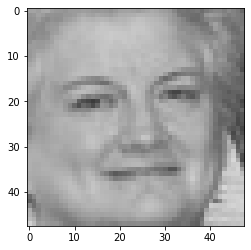

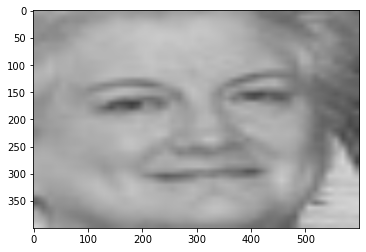

In [15]:
pic = cv2.imread('C:\\Users\\ShreerangaKV\\Documents\\optim\\images\\train\\happy\\100.jpg')
plt.imshow(pic)
plt.show()

up_width = 600
up_height = 400 
up_points = (up_width, up_height)
resized_up = cv2.resize(pic,up_points, interpolation = cv2.INTER_LINEAR)

plt.imshow(resized_up)
plt.show()

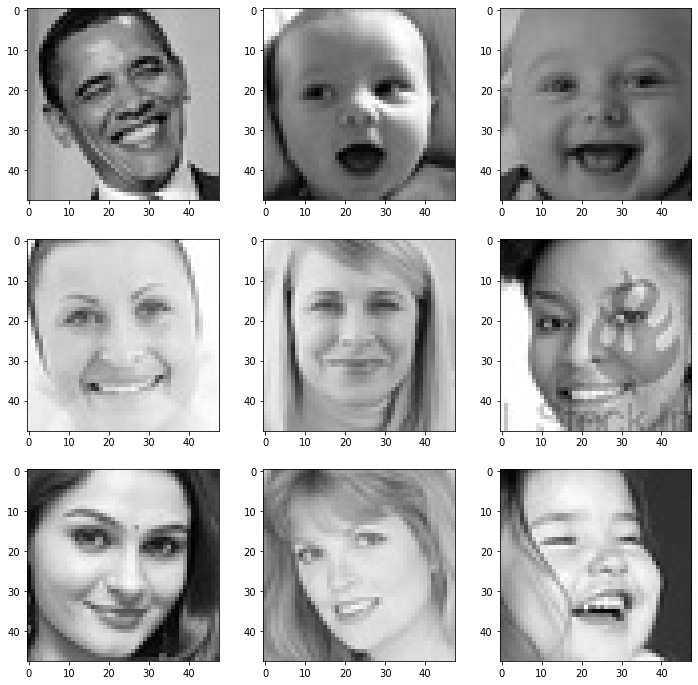

In [16]:
from keras.preprocessing.image import load_img, img_to_array
import os 
pic_size= 48
path = 'C:\\Users\\ShreerangaKV\\Documents\\optim\\images'
expression = 'happy'

plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img = load_img(path+'\\train\\'+expression+'\\'
                  + os.listdir(path+'\\train\\'+expression)[i],target_size=(pic_size,pic_size))
    plt.imshow(img)
plt.show()

In [17]:
from keras.preprocessing.image import ImageDataGenerator 
batch_size = 128 
datagen_train= ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(path+'/train',
                                             target_size= (pic_size,pic_size),
                                             color_mode = 'grayscale',
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)
test_set = datagen_val.flow_from_directory(path+'/validation',
                                             target_size= (pic_size,pic_size),
                                             color_mode = 'grayscale',
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [18]:
from keras.engine import sequential
from keras import  layers, models
from keras.layers import Dense
import tensorflow as tf
# Basic Model
no_of_classes = 7
basicModel = models.Sequential()
basicModel.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48,48,1)))
basicModel.add(layers.MaxPooling2D((2, 2)))
basicModel.add(layers.Flatten())
basicModel.add(layers.Dense(64, activation='relu'))
basicModel.add(Dense(no_of_classes, activation='softmax'))
basicModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 33856)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                2166848   
                                                                 
 dense_5 (Dense)             (None, 7)                 455       
                                                                 
Total params: 2,167,943
Trainable params: 2,167,943
Non-trainable params: 0
____________________________________________

In [19]:
# from pandas.core.common import random_state
# basicModel.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# history = basicModel.fit_generator(generator=train_set, steps_per_epoch=train_set.n//train_set.batch_size, epochs=30, 
#                     validation_data = test_set,validation_steps = test_set.n//test_set.batch_size)

In [20]:
import pandas as pd
df=pd.DataFrame(columns=['epochs','loss','accuracy','val_accuracy'])

In [21]:
def evalmodel(numOfNodes):
  tensorflow.random.set_seed(2)
  basicModel = models.Sequential()
  basicModel.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48,48,1)))
  basicModel.add(layers.MaxPooling2D((2, 2)))
  basicModel.add(layers.Flatten())
  basicModel.add(layers.Dense(numOfNodes, activation='relu'))
  basicModel.add(Dense(no_of_classes, activation='softmax'))
  basicModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  history = basicModel.fit_generator(generator=train_set, steps_per_epoch=train_set.n//train_set.batch_size, epochs=30, 
                    validation_data = test_set,validation_steps = test_set.n//test_set.batch_size)
  return history

In [ ]:
for index,item in enumerate([50,100,150,200,210,220,230,240,250,260,270,280,290,300]):
  history=evalmodel(item)
  df.loc[index]=[item,min(history.history['loss']),max(history.history['accuracy']),max(history.history['val_accuracy'])]
  print("end of epoch {}".format(item))

Epoch 1/30
225/225 [==============================] - 33s 145ms/step - loss: 10.3171 - accuracy: 0.2391 - val_loss: 1.9017 - val_accuracy: 0.2595
Epoch 2/30
225/225 [==============================] - 31s 137ms/step - loss: 1.8859 - accuracy: 0.2486 - val_loss: 1.8694 - val_accuracy: 0.2597
Epoch 3/30
225/225 [==============================] - 31s 138ms/step - loss: 1.8611 - accuracy: 0.2487 - val_loss: 1.8493 - val_accuracy: 0.2597
Epoch 4/30
225/225 [==============================] - 31s 139ms/step - loss: 1.8455 - accuracy: 0.2489 - val_loss: 1.8366 - val_accuracy: 0.2597
Epoch 5/30
225/225 [==============================] - 31s 140ms/step - loss: 1.8358 - accuracy: 0.2485 - val_loss: 1.8282 - val_accuracy: 0.2597
Epoch 6/30
225/225 [==============================] - 32s 141ms/step - loss: 1.8289 - accuracy: 0.2484 - val_loss: 1.8226 - val_accuracy: 0.2597
Epoch 7/30
225/225 [==============================] - 31s 137ms/step - loss: 1.8241 - accuracy: 0.2489 - val_loss: 1.8185 - val_a

225/225 [==============================] - 37s 165ms/step - loss: 0.2469 - accuracy: 0.9195 - val_loss: 4.6839 - val_accuracy: 0.4217
Epoch 28/30
225/225 [==============================] - 36s 159ms/step - loss: 0.3056 - accuracy: 0.8992 - val_loss: 4.7866 - val_accuracy: 0.4156
Epoch 29/30
225/225 [==============================] - 37s 165ms/step - loss: 0.2901 - accuracy: 0.9061 - val_loss: 4.9780 - val_accuracy: 0.4178
Epoch 30/30
225/225 [==============================] - 37s 165ms/step - loss: 0.2389 - accuracy: 0.9227 - val_loss: 4.9536 - val_accuracy: 0.4304
end of epoch 100
Epoch 1/30
225/225 [==============================] - 40s 178ms/step - loss: 43.8775 - accuracy: 0.2799 - val_loss: 1.7839 - val_accuracy: 0.3439
Epoch 2/30
225/225 [==============================] - 39s 171ms/step - loss: 1.5383 - accuracy: 0.4258 - val_loss: 1.7006 - val_accuracy: 0.3888
Epoch 3/30
225/225 [==============================] - 39s 175ms/step - loss: 1.3149 - accuracy: 0.5117 - val_loss: 1.717

225/225 [==============================] - 39s 174ms/step - loss: 0.2781 - accuracy: 0.9128 - val_loss: 4.2802 - val_accuracy: 0.4112
Epoch 24/30
225/225 [==============================] - 40s 179ms/step - loss: 0.2405 - accuracy: 0.9243 - val_loss: 4.3949 - val_accuracy: 0.4045
Epoch 25/30
225/225 [==============================] - 40s 179ms/step - loss: 0.2278 - accuracy: 0.9286 - val_loss: 4.4401 - val_accuracy: 0.4278
Epoch 26/30
225/225 [==============================] - 39s 174ms/step - loss: 0.2292 - accuracy: 0.9307 - val_loss: 4.6733 - val_accuracy: 0.4310
Epoch 27/30
225/225 [==============================] - 40s 178ms/step - loss: 0.1955 - accuracy: 0.9412 - val_loss: 4.8071 - val_accuracy: 0.4284
Epoch 28/30
225/225 [==============================] - 39s 175ms/step - loss: 0.1782 - accuracy: 0.9473 - val_loss: 5.0028 - val_accuracy: 0.4230
Epoch 29/30
225/225 [==============================] - 39s 174ms/step - loss: 0.1877 - accuracy: 0.9420 - val_loss: 5.3440 - val_accurac

225/225 [==============================] - 41s 180ms/step - loss: 0.3306 - accuracy: 0.8888 - val_loss: 3.8042 - val_accuracy: 0.4359
Epoch 20/30
225/225 [==============================] - 41s 184ms/step - loss: 0.3233 - accuracy: 0.8919 - val_loss: 4.0768 - val_accuracy: 0.4236
Epoch 21/30
225/225 [==============================] - 45s 200ms/step - loss: 0.2886 - accuracy: 0.9052 - val_loss: 4.0035 - val_accuracy: 0.4344
Epoch 22/30
225/225 [==============================] - 45s 201ms/step - loss: 0.2663 - accuracy: 0.9125 - val_loss: 4.3155 - val_accuracy: 0.4320
Epoch 23/30
225/225 [==============================] - 41s 184ms/step - loss: 0.2773 - accuracy: 0.9107 - val_loss: 4.4520 - val_accuracy: 0.4355
Epoch 24/30
225/225 [==============================] - 43s 192ms/step - loss: 0.2771 - accuracy: 0.9110 - val_loss: 4.6013 - val_accuracy: 0.4224
Epoch 25/30
225/225 [==============================] - 43s 190ms/step - loss: 0.2937 - accuracy: 0.9059 - val_loss: 4.5490 - val_accurac

225/225 [==============================] - 40s 179ms/step - loss: 0.4069 - accuracy: 0.8641 - val_loss: 2.7697 - val_accuracy: 0.4459
Epoch 16/30
225/225 [==============================] - 39s 175ms/step - loss: 0.3742 - accuracy: 0.8795 - val_loss: 2.9155 - val_accuracy: 0.4399
Epoch 17/30
225/225 [==============================] - 40s 177ms/step - loss: 0.3637 - accuracy: 0.8811 - val_loss: 3.1533 - val_accuracy: 0.4328
Epoch 18/30
225/225 [==============================] - 40s 179ms/step - loss: 0.3472 - accuracy: 0.8849 - val_loss: 3.2497 - val_accuracy: 0.4462
Epoch 19/30
225/225 [==============================] - 40s 177ms/step - loss: 0.3246 - accuracy: 0.8937 - val_loss: 3.4350 - val_accuracy: 0.4476
Epoch 20/30
225/225 [==============================] - 40s 176ms/step - loss: 0.3070 - accuracy: 0.9023 - val_loss: 3.5504 - val_accuracy: 0.4467
Epoch 21/30
225/225 [==============================] - 40s 177ms/step - loss: 0.2892 - accuracy: 0.9066 - val_loss: 3.7132 - val_accurac

225/225 [==============================] - 42s 186ms/step - loss: 0.6367 - accuracy: 0.7799 - val_loss: 2.2330 - val_accuracy: 0.4382
Epoch 12/30
225/225 [==============================] - 42s 188ms/step - loss: 0.5725 - accuracy: 0.8070 - val_loss: 2.3216 - val_accuracy: 0.4560
Epoch 13/30
225/225 [==============================] - 42s 188ms/step - loss: 0.5246 - accuracy: 0.8234 - val_loss: 2.4424 - val_accuracy: 0.4580
Epoch 14/30
225/225 [==============================] - 42s 188ms/step - loss: 0.4947 - accuracy: 0.8332 - val_loss: 2.6059 - val_accuracy: 0.4494
Epoch 15/30
225/225 [==============================] - 42s 185ms/step - loss: 0.4389 - accuracy: 0.8567 - val_loss: 2.7047 - val_accuracy: 0.4440
Epoch 16/30
225/225 [==============================] - 42s 187ms/step - loss: 0.3961 - accuracy: 0.8710 - val_loss: 2.8875 - val_accuracy: 0.4554
Epoch 17/30
225/225 [==============================] - 42s 187ms/step - loss: 0.3657 - accuracy: 0.8789 - val_loss: 3.0403 - val_accurac

225/225 [==============================] - 39s 175ms/step - loss: 0.7637 - accuracy: 0.7278 - val_loss: 2.3336 - val_accuracy: 0.4089
Epoch 8/30
225/225 [==============================] - 39s 174ms/step - loss: 0.6764 - accuracy: 0.7628 - val_loss: 2.4644 - val_accuracy: 0.4082
Epoch 9/30
225/225 [==============================] - 40s 176ms/step - loss: 0.5789 - accuracy: 0.8003 - val_loss: 2.6426 - val_accuracy: 0.4143
Epoch 10/30
225/225 [==============================] - 41s 181ms/step - loss: 0.4929 - accuracy: 0.8347 - val_loss: 2.9125 - val_accuracy: 0.4038
Epoch 11/30
225/225 [==============================] - 39s 174ms/step - loss: 0.4419 - accuracy: 0.8524 - val_loss: 3.0617 - val_accuracy: 0.4109
Epoch 12/30
225/225 [==============================] - 39s 173ms/step - loss: 0.3676 - accuracy: 0.8786 - val_loss: 3.2556 - val_accuracy: 0.4095
Epoch 13/30
225/225 [==============================] - 39s 175ms/step - loss: 0.3361 - accuracy: 0.8935 - val_loss: 3.5401 - val_accuracy:

In [ ]:
df.to_csv('num_nodes_opt.csv', sep='\t', encoding='utf-8', index=False)